# MASINSKO UCENJE DRUGI PROJEKAT
---

*Nada Jovanovic 1618*  
*Milica Jovanovic 1636*


## Import
---

In [2]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

## Dataset
---

In [3]:
data = pd.read_csv("data.csv")
data = data.drop(columns = [data.columns[0]])
data1 = pd.read_csv("data.csv")
data1 = data1.drop(columns = [data1.columns[0]])
data.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         420 non-null    object 
 14  Weight               264 non-null    object 
dtypes: float64(6), object(9)
memory usage: 5

In [ ]:
data.describe()


## Vizuelizacija podataka
---


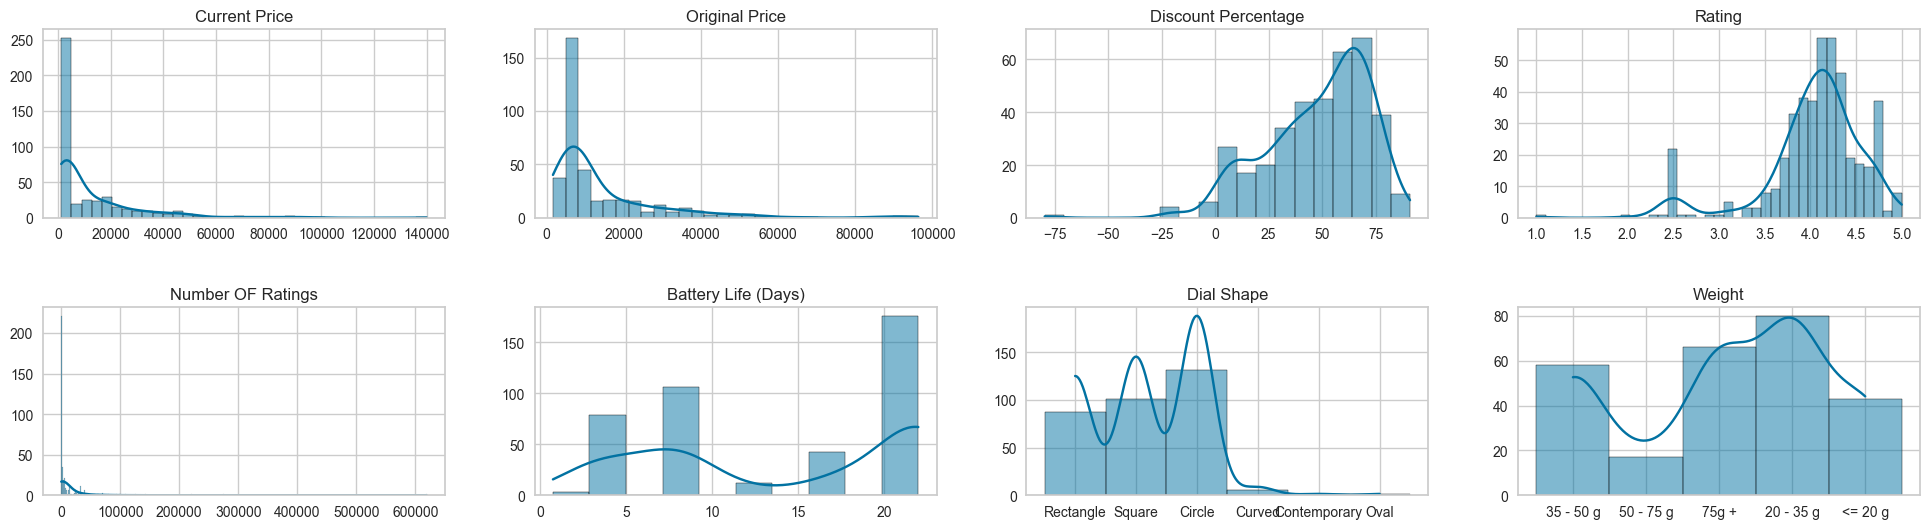

In [108]:
columns_num = ['Current Price', 'Original Price', 'Discount Percentage', 'Rating', 'Number OF Ratings','Battery Life (Days)', 'Dial Shape', 'Weight']

fig, axes = pyplot.subplots(2, 4, figsize=(20, 6))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

Moze se uociti da **Current Price**, **Original Price** i **Number OF Rating** imaju neke ekstremne vrednosti koje bi mozda trebalo ukloniti, dok **Discount percentage** sadrzi negetivne vrednosti koje treba prebaciti u pozitivne.

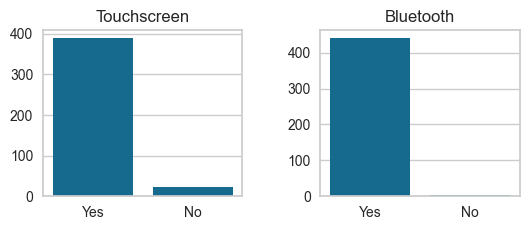

In [109]:
columns_num = ['Touchscreen', 'Bluetooth']

fig, axes = pyplot.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

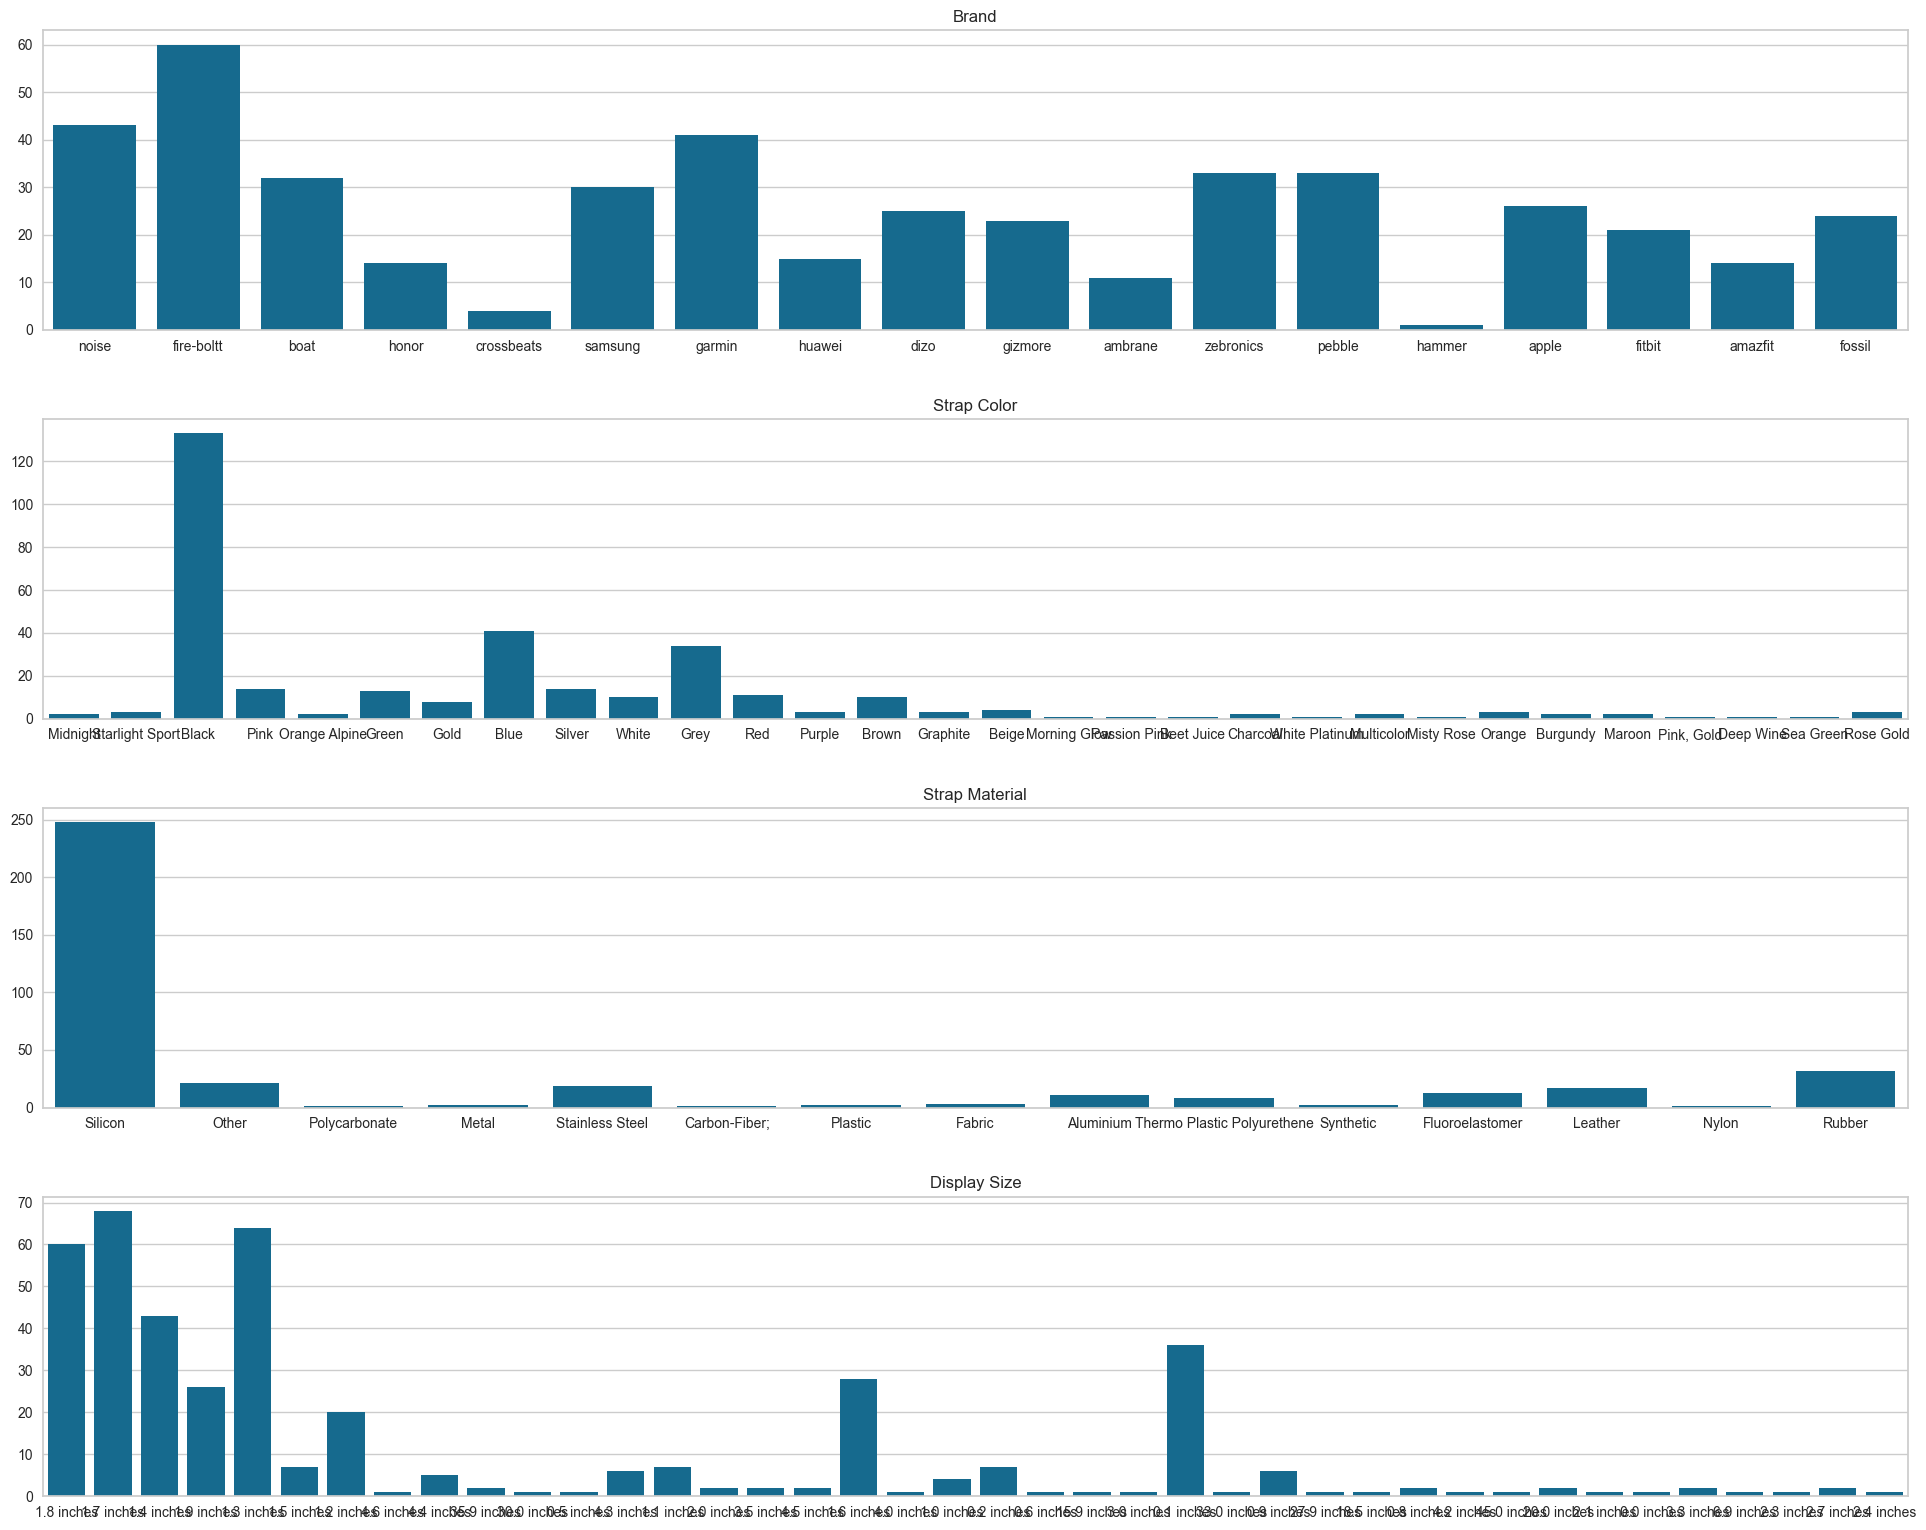

In [112]:
columns_num = ['Brand', 'Strap Color', 'Strap Material', 'Display Size']

fig, axes = pyplot.subplots(4, 1, figsize=(20, 16))
axes = axes.flatten()
for i, column_name in enumerate(columns_num):
    sns.countplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('', fontsize=15)
    axes[i].set_ylabel('')
    axes[i].FontSize = 5

pyplot.tight_layout()
pyplot.show()

### Missing values

In [26]:
nan_count = data.isnull().sum().sort_values()
print('Number of NaN values:')
print(nan_count)

# n_miss = {}

# for column in data.columns:
#     # count number of rows with missing values
#     n_miss[column] = {}
#     n_miss[column]["Count"] = data[column].isnull().sum()
#     n_miss[column]["%"] = round(n_miss[column]["Count"] / data.shape[0] * 100, 2)

# pd.DataFrame.from_dict(n_miss).T


Number of NaN values:
Brand                    0
Rating                   6
Bluetooth                6
Current Price           10
Display Size            30
Battery Life (Days)     32
Model Name              35
Touchscreen             37
Number OF Ratings       59
Strap Material          69
Original Price          73
Discount Percentage     73
Dial Shape             123
Strap Color            123
Weight                 186
dtype: int64


<Axes: >

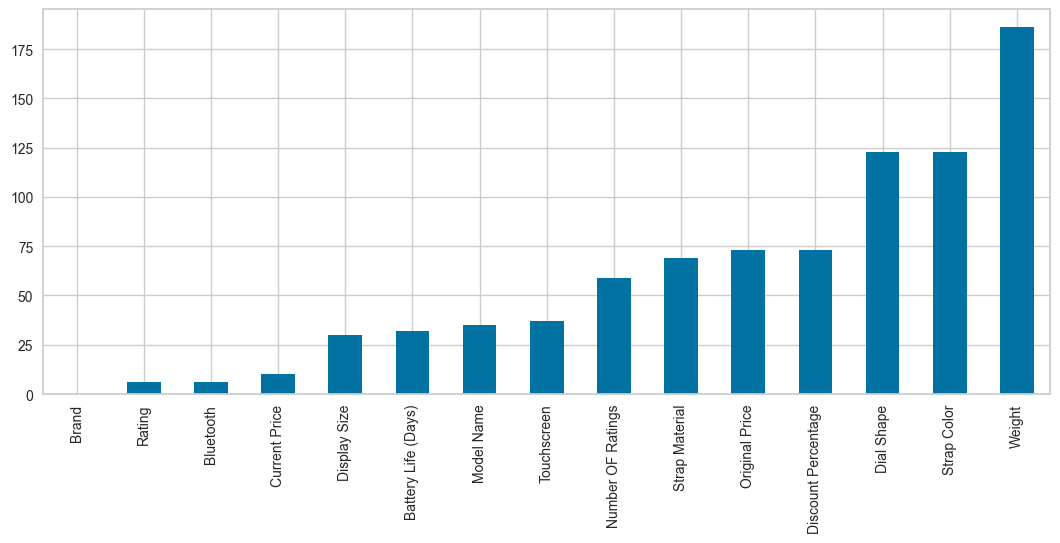

In [27]:

nan_count.plot(kind='bar', figsize=(13, 5))

In [62]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 450
Number Of Rows After Deduping: 440


In [63]:
data = data.drop_duplicates()
data1 = data1.drop_duplicates()

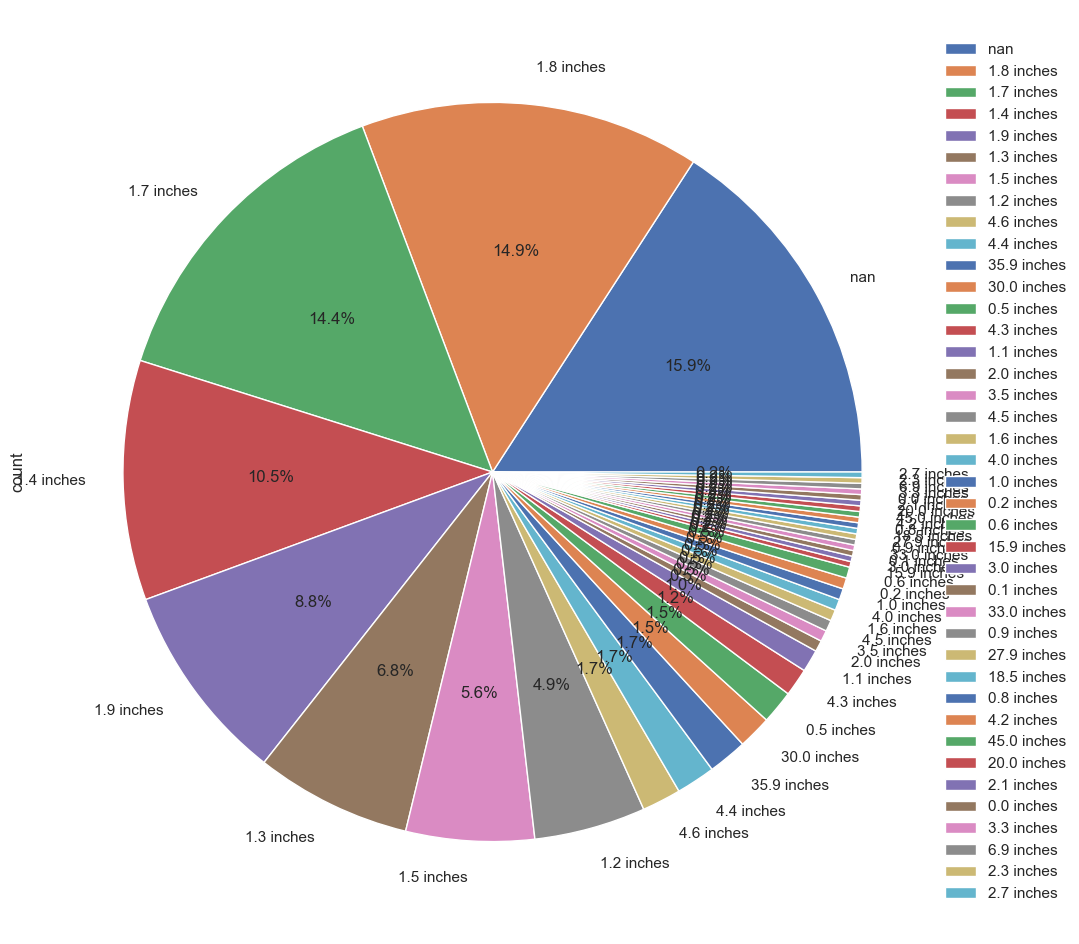

In [64]:

# da li izbaciti celu kolonu?
pyplot.figure(figsize=(12, 12))
pie = data["Display Size"].value_counts().plot(kind='pie', labels=data["Display Size"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
pyplot.show()


In [65]:

scale_mapper = {
    '75g +': 1,
    '50 - 75 g': 2,
    '35 - 50 g': 3,
    '20 - 35 g': 4,
    '<= 20 g': 5 }

data1["Weight"] = data["Weight"].replace(scale_mapper)

scale_mapper = {
    'Yes': True,
    'No': False }

data1["Bluetooth"] = data["Bluetooth"].replace(scale_mapper)
data1["Touchscreen"] = data["Touchscreen"].replace(scale_mapper)


data1.head()




,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,True,NaN,3.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,True,3.5,True,1.8 inches,2.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,True,8.0,True,1.7 inches,3.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,True,3.5,True,1.8 inches,1.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,True,8.0,True,1.7 inches,3.0


In [66]:
data1["Display Size"] = data["Display Size"].str.replace(" inches", "")

data1["Display Size"]  = data["Display Size"].str.replace(" inches", "").astype(float)
data1["Display Size"] = data1["Display Size"].astype(float)

data1["Display Size"]
data1["Display Size"].isnull().sum()

30

In [77]:

list = [1.7, 1.8, 1.9, 1.3, 1.4, 1.6, 0.1 ]
uslov = ~data1["Display Size"].isin(list) & data1['Display Size'].notna()

data1["Display Size"] = np.where(uslov,1,data1["Display Size"])

print(len(data1["Display Size"]))
data1["Display Size"].isnull().sum()


440


30

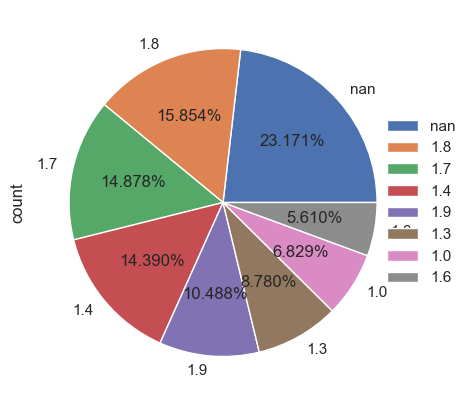

Display Size
1.0    95
1.7    65
1.3    61
1.8    59
1.4    43
0.1    36
1.6    28
1.9    23
Name: count, dtype: int64

In [81]:
pyplot.figure(figsize=(5, 5))
pie = data1["Display Size"].value_counts().plot(kind='pie', labels=data1["Display Size"].unique(), autopct='%0.3f%%')
pie.figure.legend(loc='right')
pyplot.show()

data1["Display Size"].unique()
data1["Display Size"].value_counts()

In [69]:
data1 = data1.

SyntaxError: invalid syntax (1611679023.py, line 1)

In [ ]:
data1 = data1.drop(columns=["Strap Material", "Strap Color", "Dial Shape", "Model Name" ])


In [ ]:
data1


,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,NaN,8.0,True,NaN,3.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,True,3.5,True,1.8,2.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,True,8.0,True,1.7,3.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,True,3.5,True,1.8,1.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,True,8.0,True,1.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,True,22.0,True,1.3,NaN
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,True,8.0,True,0.1,NaN
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,True,22.0,True,1.3,NaN
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,True,22.0,True,0.1,NaN


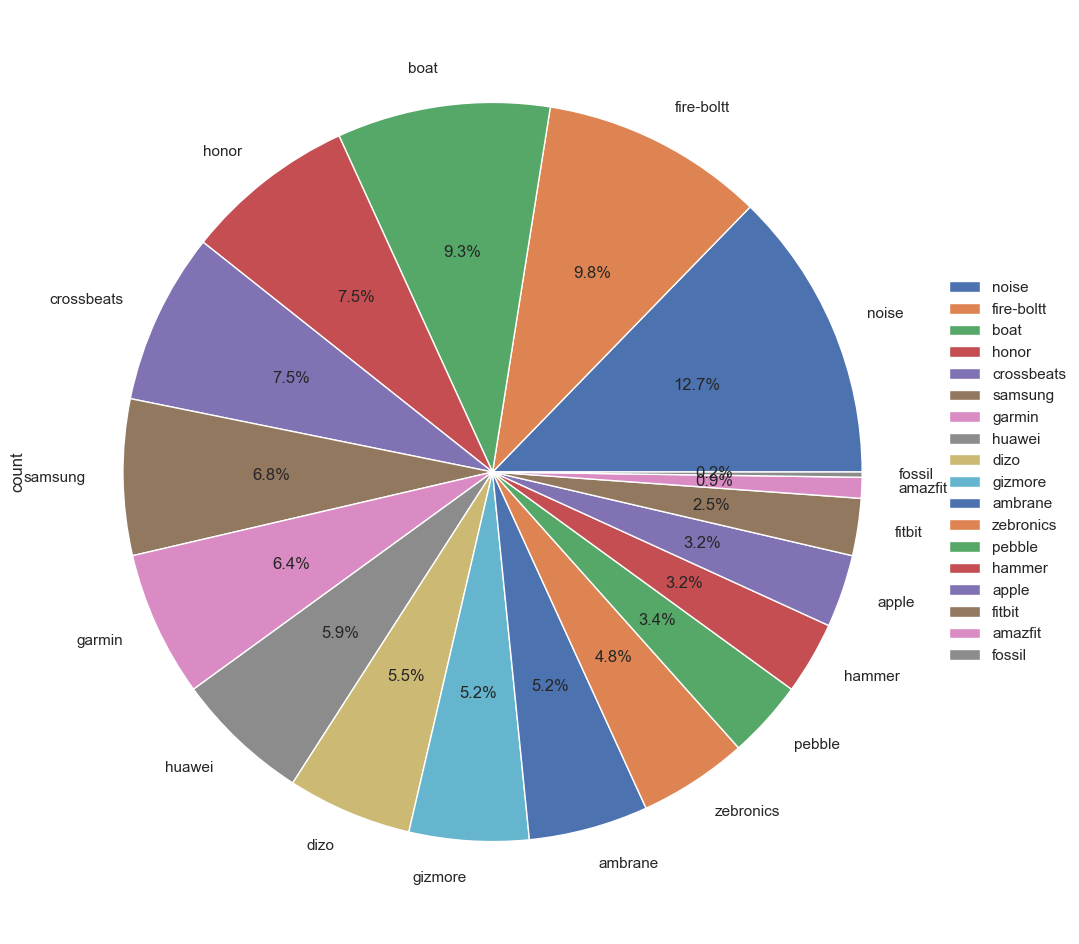

In [ ]:
pyplot.figure(figsize=(12, 12))
pie = data["Brand"].value_counts().plot(kind='pie', labels=data["Brand"].unique(), autopct='%0.1f%%')
pie.figure.legend(loc='right')
pyplot.show()

In [ ]:

data1 = pd.get_dummies(data=data1, columns=['Brand'])
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,...,Brand_fossil,Brand_garmin,Brand_gizmore,Brand_hammer,Brand_honor,Brand_huawei,Brand_noise,Brand_pebble,Brand_samsung,Brand_zebronics
0,82990.0,89900.0,7.686318,4.0,65.0,NaN,8.0,True,NaN,3.0,...,False,False,False,False,False,False,True,False,False,False
1,3799.0,16999.0,77.651627,4.3,20788.0,True,3.5,True,1.8,2.0,...,False,False,False,False,False,False,False,False,False,False
2,1999.0,7990.0,74.981227,3.8,21724.0,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,False,False,False,False
3,1799.0,19999.0,91.004550,4.3,13244.0,True,3.5,True,1.8,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1599.0,4999.0,68.013603,4.1,13901.0,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,33.337037,2.5,NaN,True,22.0,True,1.3,NaN,...,False,False,False,False,False,False,False,False,False,False
446,3700.0,9999.0,62.996300,NaN,NaN,True,8.0,True,0.1,NaN,...,False,False,False,False,False,False,False,False,False,False
447,5999.0,8999.0,33.337037,2.5,NaN,True,22.0,True,1.3,NaN,...,False,False,False,False,False,False,False,False,False,False
448,3200.0,7999.0,59.994999,NaN,NaN,True,22.0,True,0.1,NaN,...,False,False,False,False,False,False,False,False,False,False


### Filling missing values


Strategije popunjavanja:
- mean
- median
- mode
- constant

In [ ]:
data1.fillna(data1.mean(),inplace=True)
data1.isna().sum()

Current Price          0
Original Price         0
Discount Percentage    0
Rating                 0
Number OF Ratings      0
Touchscreen            0
Battery Life (Days)    0
Bluetooth              0
Display Size           0
Weight                 0
Brand_amazfit          0
Brand_ambrane          0
Brand_apple            0
Brand_boat             0
Brand_crossbeats       0
Brand_dizo             0
Brand_fire-boltt       0
Brand_fitbit           0
Brand_fossil           0
Brand_garmin           0
Brand_gizmore          0
Brand_hammer           0
Brand_honor            0
Brand_huawei           0
Brand_noise            0
Brand_pebble           0
Brand_samsung          0
Brand_zebronics        0
dtype: int64

In [ ]:
data1

,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,...,Brand_fossil,Brand_garmin,Brand_gizmore,Brand_hammer,Brand_honor,Brand_huawei,Brand_noise,Brand_pebble,Brand_samsung,Brand_zebronics
0,82990.0,89900.0,7.686318,4.0,65.0,1.0,8.0,True,1.4,3.0,...,False,False,False,False,False,False,True,False,False,False
1,3799.0,16999.0,77.651627,4.3,20788.0,True,3.5,True,1.8,2.0,...,False,False,False,False,False,False,False,False,False,False
2,1999.0,7990.0,74.981227,3.8,21724.0,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,False,False,False,False
3,1799.0,19999.0,91.004550,4.3,13244.0,True,3.5,True,1.8,1.0,...,False,False,False,False,False,False,False,False,False,False
4,1599.0,4999.0,68.013603,4.1,13901.0,True,8.0,True,1.7,3.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,33.337037,2.5,830.0,True,22.0,True,1.3,3.0,...,False,False,False,False,False,False,False,False,False,False
446,3700.0,9999.0,62.996300,4.1,830.0,True,8.0,True,0.1,3.0,...,False,False,False,False,False,False,False,False,False,False
447,5999.0,8999.0,33.337037,2.5,830.0,True,22.0,True,1.3,3.0,...,False,False,False,False,False,False,False,False,False,False
448,3200.0,7999.0,59.994999,4.1,830.0,True,22.0,True,0.1,3.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_corr = data1.corr()
pyplot.figure(figsize = (16,16))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
pyplot.show()

## Standardize

In [ ]:

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(data1)


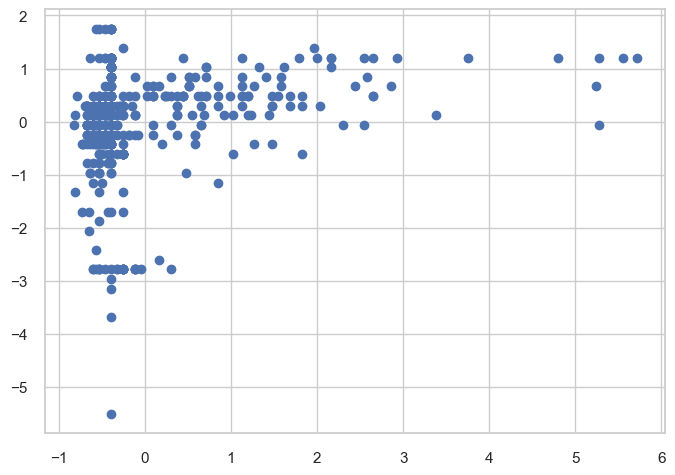

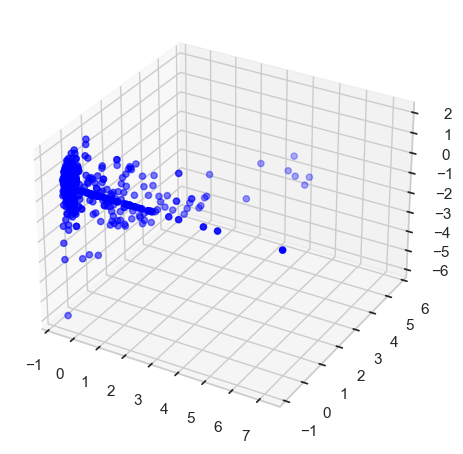

In [ ]:
fig = pyplot.figure(0)
pyplot.grid(True)
pyplot.scatter(features_std[:,1],features_std[:,3])
pyplot.show()

fig = pyplot.figure()
ax = pyplot.axes(projection='3d')

ax.scatter(features_std[:,0], features_std[:,1],features_std[:,2], c='blue', marker='o')



[[ 1.82595589e+00  1.83867445e+00 -1.04910342e+00  7.81523237e-01
  -2.38813847e-01 -1.41112936e+00  1.13484263e-01 -1.67619600e-01
  -5.76519765e-01  9.38970330e-02 -1.81283893e-01 -1.60128154e-01
  -2.50603137e-01 -2.60693623e-01 -9.57826285e-02 -2.34852880e-01
  -3.81881308e-01 -2.23873473e-01 -2.40192231e-01  3.03356531e+00
  -2.34852880e-01 -4.77273960e-02 -1.81283893e-01 -1.87867287e-01
  -2.44917883e-01 -2.84747399e-01 -2.70500890e-01 -2.84747399e-01]
 [ 5.67808423e-01 -2.39144490e-01 -2.58069377e-01  3.59299675e-01
  -6.58947052e-04  2.40192231e-01  5.47787285e-01  9.57826285e-02
   7.16439045e-01  4.23894907e-01 -1.81283893e-01 -1.60128154e-01
   1.82987574e+00 -2.60693623e-01  6.99393910e-01  1.71486914e+00
  -3.81881308e-01 -2.23873473e-01 -2.40192231e-01 -3.20557159e-01
  -2.34852880e-01 -4.77273960e-02 -1.81283893e-01 -1.87867287e-01
  -3.29108405e-01 -2.84747399e-01 -2.70500890e-01 -2.84747399e-01]
 [ 2.44515102e-01  4.55695843e-01 -6.42881244e-01  4.34216586e-01
  -1.901

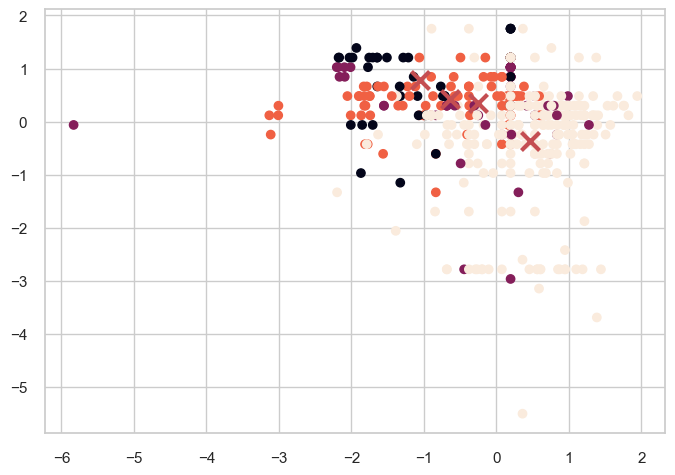

In [91]:
# Create k-mean object
cluster = KMeans(n_clusters=4, random_state=0)
# Train model
model = cluster.fit(features_std)

centroids = model.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = model.labels_

print(centroids)

# Iscrtavanje podataka i središta klastera
pyplot.scatter(features_std[:, 2], features_std[:, 3], c=labels)
pyplot.scatter(centroids[:, 2], centroids[:, 3], marker='x', s=169, linewidths=3, color='r', zorder=10)
pyplot.show()

In [ ]:

# pca = PCA(n_components=3, random_state=80)
# pca.fit(features_std)
# df_pca = pd.DataFrame(pca.transform(features_std), columns=(["f1","f2", "f3"]))
# df_pca.describe().T

In [ ]:
#Primećujemo da je opisano svega 40% varijabilnosti između podataka
pca.explained_variance_ratio_.cumsum()

array([0.1183003 , 0.18531068, 0.24356043])

In [ ]:
pca = PCA(n_components=20, random_state=80)
pca.fit(features_std)
pca.explained_variance_ratio_.cumsum()

array([0.1183003 , 0.18531068, 0.24356043, 0.29696477, 0.34814591,
       0.39366993, 0.43805021, 0.48063586, 0.52119709, 0.56007458,
       0.5987192 , 0.63651211, 0.67402354, 0.71120966, 0.74809988,
       0.78450613, 0.82053788, 0.84807859, 0.87423885, 0.89923964])

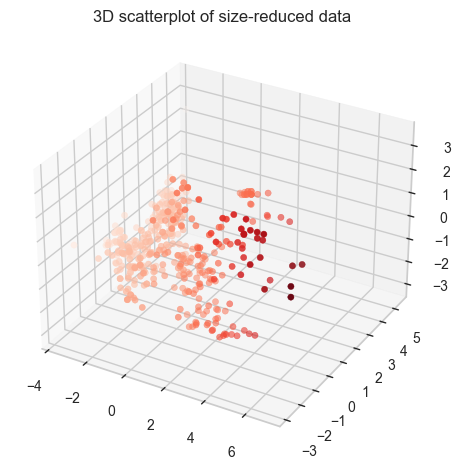

In [ ]:
x =df_pca["f1"]
y =df_pca["f2"]
z =df_pca["f3"]

fig = pyplot.figure()
ax = pyplot.axes(projection='3d')

ax.scatter3D(x, y, z, c=x, cmap='Reds')
ax.set_title("3D scatterplot of size-reduced data")

pyplot.show()

Elbow Method to determine the number of clusters to be formed:


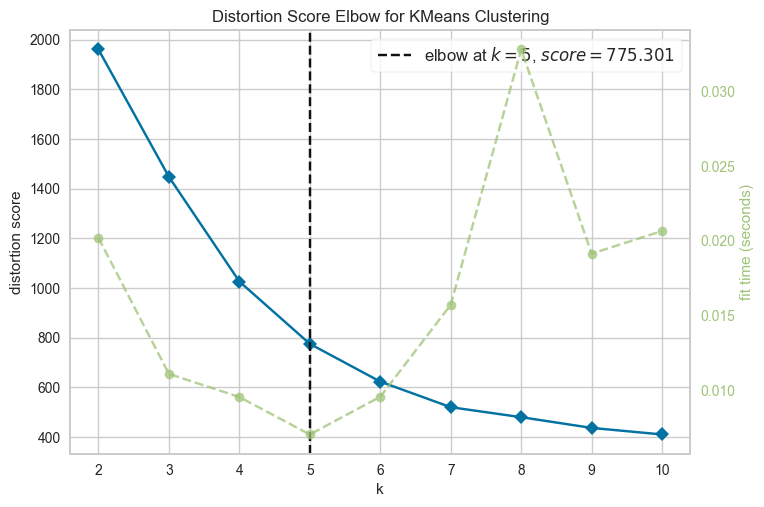

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [ ]:

#Ulaz u algoritam
X = df_pca.values

# Inicijalizacija modela
kmeans = KMeans(n_clusters=Elbow_M.elbow_value_, n_init=50, init='k-means++', max_iter=500).fit(X)

y_kmeans = kmeans.predict(X)

# Izračunavanje središta klastera
centroids = kmeans.cluster_centers_

# Izračunavanje klastera za svaki primer
labels = kmeans.labels_

# Iscrtavanje podataka i središta klastera
pyplot.scatter(X[:, 0], X[:, 1], c=labels)
pyplot.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)
pyplot.show()

df_pca["cluster"] = y_kmeans
najbolji_standardizovani_pca = df_pca.copy()
najbolji_standardizovani = features_std.copy()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

C:\Users\milica\AppData\Local\Temp\ipykernel_8376\3443254425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=df_pca["cluster"], palette= pal)


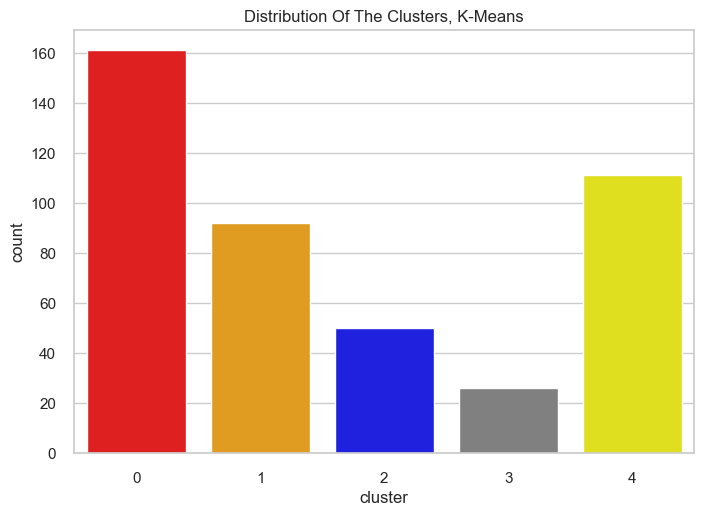

In [ ]:
#Plotting countplot of clusters
pal = ["#FF0000", "#FFA500", "#0000FF", "#808080", "#FFFF00"]
pl = sns.countplot(x=df_pca["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters, K-Means")
pyplot.show()